## Import Packages

In [4]:
# import ROOT 
import pylhe
import math
import matplotlib.pyplot as plt
import numpy as np
import ROOT
from tqdm import tqdm
# %jsroot on

## Define Function

In [24]:
def invariant_mass(p1,p2):
    return math.sqrt(sum((1 if index=='e' else -1)*(getattr(p1,index)+getattr(p2,index))**2 for index in ['e','px','py','pz']))

def invariant_mass_one(p1):
    return math.sqrt(sum((1 if index=='e' else -1)*(getattr(p1,index))**2 for index in ['e','px','py','pz']))

def transvers_mass(p1,p2):
#     return math.sqrt(sum((1 if index=='e' else -1)*(getattr(p1,index))**2 for index in ['e','pz']))
    return math.sqrt(sum((1 if index=='e' else -1)*(getattr(p1,index)+getattr(p2,index))**2 for index in ['e','pz']))

def Momentum_Transfrom(particle):
    E, px ,py, pz = particle.e, particle.px, particle.py, particle.pz
    P = np.sqrt(px**2 + py**2 + pz**2)
    pt = np.sqrt(px**2 + py**2)
    eta = 1./2.*np.log((P + pz)/(P - pz))
    phi = np.arctan(py/px)
    m = np.sqrt(np.sqrt((E**2 - px**2 - py**2 - pz**2)**2))

    return pt, eta, phi, m

def find_fianl_quarks(find_particle):
    jet = [1,2,3,4,5,6,7,21]
#     for i in range(1,7):
    for i, element in enumerate(jet):    
        tmp = find_particle[(find_particle[:,2]==1)]
        tmp = tmp[(np.abs(tmp[:,0])==element)]
        if len(tmp) == 2:
            p1 = int(tmp[0][1])
            p2 = int(tmp[1][1])
            break
        
#     for i in range(1,7):
    for i, element in enumerate(jet):    
        tmp = find_particle[(find_particle[:,2]==1)]
        tmp = tmp[(np.abs(tmp[:,0])==element)]
        if len(tmp) == 1:
            p1 = int(tmp[0][1])  
#             for j in range(i+1,7):
            for j, element in enumerate(jet[i+1:]):    
                tmp = find_particle[(find_particle[:,2]==1)]
                tmp = tmp[(np.abs(tmp[:,0])==element)]
                if len(tmp) == 1:
                    p2 = int(tmp[0][1])
                    break

            break
    return(p1, p2)

def Event_List(LHE_file):
    event_list = []
    Mhh = []
    PT_h1, PT_h2 = [], []
    for i, event in enumerate (LHE_file):
        find_particle = []
        for j, element in enumerate(event.particles):
            find_particle.append([element.id,j,element.status]) #id, index, status

        find_particle = np.array(find_particle)
        
        event_list.append(event)


        tmp_h1 = int(find_particle[np.abs(find_particle[:,0])==25][0][1])
        tmp_h2 = int(find_particle[np.abs(find_particle[:,0])==25][1][1])
        PT_h1.append(Momentum_Transfrom(event.particles[tmp_h1])[0])
        PT_h2.append(Momentum_Transfrom(event.particles[tmp_h2])[0])
        Mhh.append(invariant_mass(event.particles[tmp_h1],event.particles[tmp_h2]))

#         if i == 1:
#             break
        
    return event_list, Mhh, PT_h1, PT_h2

# Create a Event List and Mass List

In [25]:
process_path = '/home/u5/proc_ppHhh/Events/run_01_decayed_1/unweighted_events.lhe' 
process = pylhe.readLHE(process_path)
process_event_list, Mhh, PT_h1, PT_h2 = Event_List(process)


## Print Information for First Event

In [26]:
index = 0
print("{:^12}{:^9}{:^12}{:^12}{:^12}{:^12}{:^12}{:^12}{:^12}".format("#","id","mother1","mother2","e","px","py","pz","status"))

for i, element in  enumerate(process_event_list[index].particles):
    print("{:^12}{:^9.0f}{:^12.0f}{:^12.0f}{:^12.3f}{:^12.3f}{:^12.3f}{:^12.3f}{:^12.0f}".format(i+1, element.id,element.mother1,element.mother2,element.e,element.px,element.py,element.pz,element.status))


# dir(GM_eventlist[0][0].particles[0]) #Check variables stored in particle
# [i.event for i in GM_eventlist[0].particles]
# [i.status for i in GM_eventlist[0].particles] #particle status for first event (Parton level)
# [i.mothers for i in GM_eventlist[0].particles] #particle id for first event (Parton level)


     #         id      mother1     mother2        e           px          py          pz        status   
     1         21         0           0        544.652      0.000       0.000      544.652        -1     
     2         21         0           0        459.009      -0.000      -0.000     -459.009       -1     
     3         35         1           2        1003.661     0.000       0.000       85.643        2      
     4         25         3           3        471.841     -164.335    294.570     -305.979       2      
     5          5         4           4         72.590     -51.507      49.583     -11.647        1      
     6         25         3           3        531.819     164.335     -294.570    391.622        2      
     7         -5         4           4        399.252     -112.828    244.986     -294.332       1      
     8          5         6           6        212.611      43.875     -165.786    125.585        1      
     9         -5         6           6       

## Plot for $M_H$

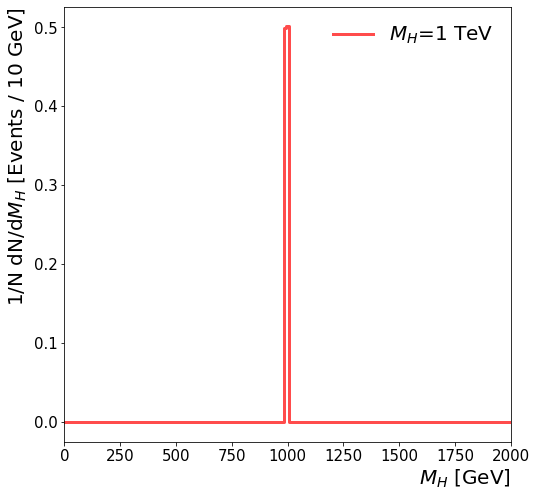

In [34]:
plt.figure(figsize=(8,8)) # plotsize

bin_size = np.linspace(0,2000,201)
hist, bins = np.histogram(Mhh, bins=bin_size)
plt.step(bins[:-1], hist.astype(np.float32)/np.sum(hist),color = "red", where='mid',linewidth=3, alpha=0.7,label="$M_H$=1 TeV") 

# plt.legend(bbox_to_anchor=(0.95, 1),ncol=1,fontsize=20)
plt.legend(loc="best",ncol=1,fontsize=20, edgecolor = "w",fancybox=False, framealpha=0)# plot label tag
# plt.yscale('log') 
plt.xlabel("$M_H$ [GeV]" , fontsize=20, horizontalalignment='right',x=1)  # plot x-axis label
plt.ylabel("1/N dN/d$M_H$ [Events / 10 GeV]", fontsize=20, horizontalalignment='right',y=1)  # plot y-axis label
plt.xticks(fontsize=15)   # set x-ticks size
plt.yticks(fontsize=15)   # set y-ticks size 
# plt.ylim((0,0.13))
plt.xlim((0,2000))
# plt.ylim((0.5,1000))
# plt.savefig("./invariant_mass_SVJ.png")  #save figure as png
plt.show()

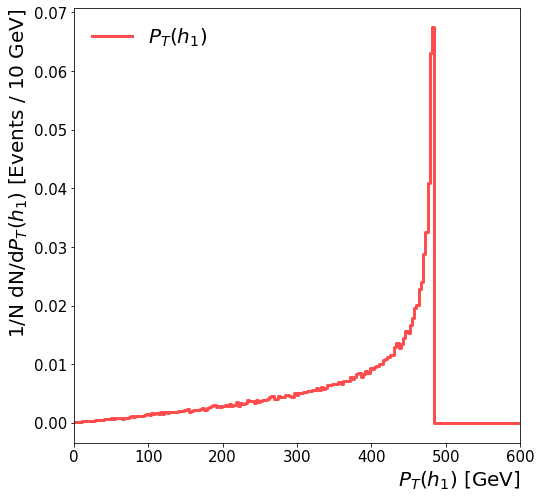

In [33]:
plt.figure(figsize=(8,8)) # plotsize

bin_size = np.linspace(0,600,201)
hist, bins = np.histogram(PT_h1, bins=bin_size)
plt.step(bins[:-1], hist.astype(np.float32)/np.sum(hist),color = "red", where='mid',linewidth=3, alpha=0.7,label="$P_T(h_1)$") 

# plt.legend(bbox_to_anchor=(0.95, 1),ncol=1,fontsize=20)
plt.legend(loc="best",ncol=1,fontsize=20, edgecolor = "w",fancybox=False, framealpha=0)# plot label tag
# plt.yscale('log') 
plt.xlabel("$P_T(h_1)$ [GeV]" , fontsize=20, horizontalalignment='right',x=1)  # plot x-axis label
plt.ylabel("1/N dN/d$P_T(h_1)$ [Events / 10 GeV]", fontsize=20, horizontalalignment='right',y=1)  # plot y-axis label
plt.xticks(fontsize=15)   # set x-ticks size
plt.yticks(fontsize=15)   # set y-ticks size 
# plt.ylim((0,0.13))
plt.xlim((0,600))
# plt.ylim((0.5,1000))
# plt.savefig("./invariant_mass_SVJ.png")  #save figure as png
plt.show()

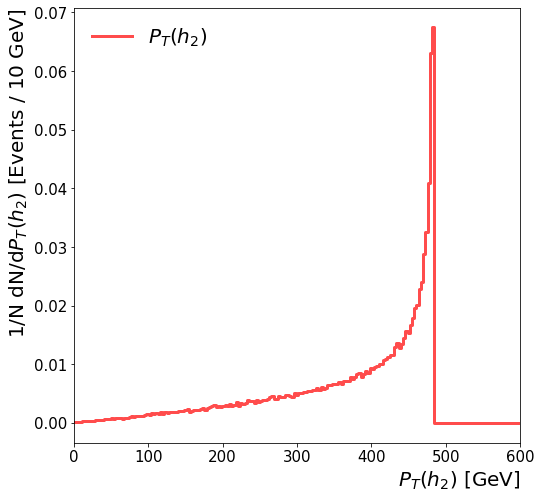

In [32]:
plt.figure(figsize=(8,8)) # plotsize

bin_size = np.linspace(0,600,201)
hist, bins = np.histogram(PT_h2, bins=bin_size)
plt.step(bins[:-1], hist.astype(np.float32)/np.sum(hist),color = "red", where='mid',linewidth=3, alpha=0.7,label="$P_T(h_2)$") 

# plt.legend(bbox_to_anchor=(0.95, 1),ncol=1,fontsize=20)
plt.legend(loc="best",ncol=1,fontsize=20, edgecolor = "w",fancybox=False, framealpha=0)# plot label tag
# plt.yscale('log') 
plt.xlabel("$P_T(h_2)$ [GeV]" , fontsize=20, horizontalalignment='right',x=1)  # plot x-axis label
plt.ylabel("1/N dN/d$P_T(h_2)$ [Events / 10 GeV]", fontsize=20, horizontalalignment='right',y=1)  # plot y-axis label
plt.xticks(fontsize=15)   # set x-ticks size
plt.yticks(fontsize=15)   # set y-ticks size 
# plt.ylim((0,0.13))
plt.xlim((0,600))
# plt.ylim((0.5,1000))
# plt.savefig("./invariant_mass_SVJ.png")  #save figure as png
plt.show()